In [24]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from obspy.signal.tf_misfit import plot_tfr

In [25]:
# 파일명
file_name = 'LPMS_E_0_0.00_20890613195022511_RAW.csv'

# Daraframe형식으로 엑셀 파일 읽기
df = pd.read_csv(file_name)

# 데이터 프레임 출력
df

,idx,V-101,V-102,V-103,V-104,V-105,V-106,V-107,V-108,V-109,V-110,V-111,V-112,V-113,V-114,V-115,V-116,V-117,V-118
0,0,0.105690,0.117723,0.124105,-0.020226,0.081804,-0.012730,0.092720,0.116768,0.016436,0.096893,0.135067,0.123524,0.108623,0.112940,0.127729,-0.003574,0.080408,0.095808
1,1,0.113136,0.127748,0.132181,-0.020550,0.094101,-0.012730,0.105982,0.116768,0.016436,0.107248,0.145727,0.133223,0.120596,0.109060,0.137751,0.002245,0.086542,0.106482
2,2,0.111517,0.124838,0.131212,-0.018288,0.089571,-0.012730,0.101129,0.116768,0.016111,0.103041,0.141527,0.129019,0.117361,0.110678,0.134840,-0.000988,0.086864,0.101954
3,3,0.104073,0.112225,0.121521,-0.019257,0.075655,-0.012730,0.086575,0.116444,0.016760,0.092039,0.128605,0.117704,0.102799,0.110031,0.122234,-0.010042,0.076534,0.089338
4,4,0.112812,0.128073,0.132181,-0.018288,0.093130,-0.012730,0.104042,0.116444,0.016111,0.107571,0.147018,0.133545,0.121244,0.107120,0.137751,0.003538,0.088156,0.107775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.114756,0.130013,0.137348,-0.019581,0.107693,-0.012405,0.117628,0.116768,0.015465,0.116955,0.155743,0.142920,0.129658,0.111324,0.145830,0.008066,0.095259,0.117477
19996,19996,0.110546,0.123222,0.132503,-0.018610,0.095396,-0.012405,0.105013,0.117090,0.015465,0.108219,0.148634,0.135162,0.119949,0.113911,0.136780,0.002569,0.087833,0.108421
19997,19997,0.109575,0.120958,0.130566,-0.018934,0.091835,-0.013052,0.101778,0.116121,0.014818,0.104012,0.142496,0.130312,0.118654,0.110678,0.136133,-0.000988,0.084604,0.104218
19998,19998,0.110222,0.129044,0.128303,-0.020872,0.101221,-0.013052,0.108570,0.116121,0.015141,0.110807,0.148634,0.136778,0.122215,0.110353,0.137426,0.004509,0.086542,0.111332


### 시간-주파수

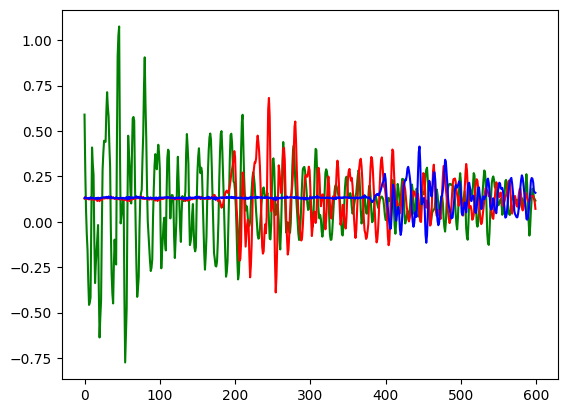

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 0.1sec 동안 20000개
N = 20000
dt = 0.001 
t = np.arange(600)
v101 = df['V-101'][3000:3600]
v102 = df['V-102'][3000:3600]
v103 = df['V-103'][3000:3600]

plt.plot(t, v101, color='green')
plt.plot(t, v102, color='red')
plt.plot(t, v103, color='blue')

plt.show()

### FFT

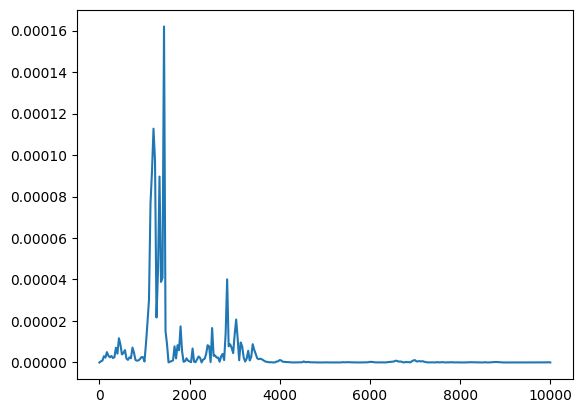

In [27]:
f101, Pxx_den = signal.periodogram(v101, N)
plt.plot(f101, Pxx_den)
plt.show()

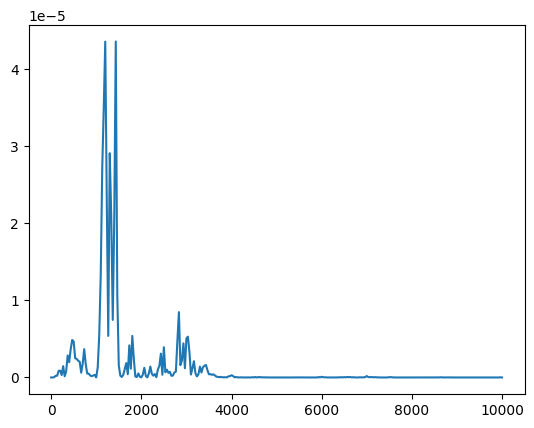

In [28]:
f102, Pxx_den = signal.periodogram(v102, N)
plt.plot(f102, Pxx_den)
plt.show()

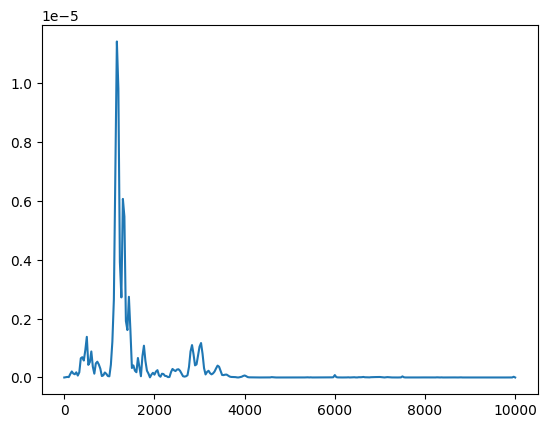

In [29]:
f103, Pxx_den = signal.periodogram(v103, N)
plt.plot(f103, Pxx_den)
plt.show()

### STFT

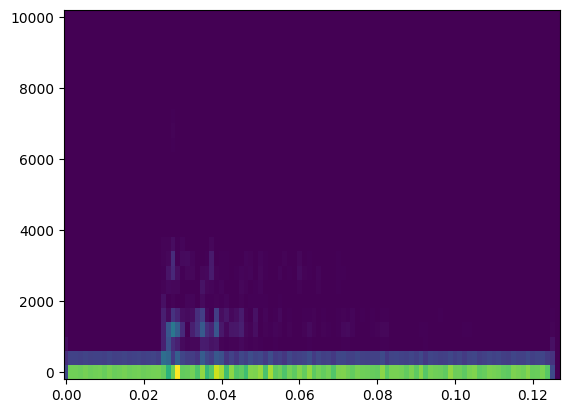

In [34]:
l, r = 2500, 5000

t = np.arange(l, r+1)
v101 = df['V-101'].loc[l:r]
v102 = df['V-102'].loc[l:r]
v103 = df['V-103'].loc[l:r]

v = v101+v102+v103
f, t, Zxx = signal.stft(v, N, nperseg=50)
plt.pcolormesh(t, f, np.abs(Zxx)**2)
plt.show()

In [31]:
v101 = v101.to_numpy()

In [32]:
fmin = 500.
fmax = 20000
nf = 15000

In [35]:
plot_tfr(v101, dt=dt, fmin=fmin, fmax=fmax, mode='power', nf=nf)

AttributeError: 'Series' object has no attribute 'reshape'